## 라이브러리 호출

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [2]:
# json 불러오기
file_path = "../chunker/ionic5_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

ionic5 = pd.DataFrame(data)

# 결과 확인
print(ionic5.head())


                                                text      type  \
0  목차\n0.\n1.\n2.\n3.\n전기차 시작하기 ....................     title   
1  전기차 시작하기\n0.\n이 장에서는 차량에 적용된 새로운 기술을 소개하고 주요 기...     title   
2  차량 살펴보기\n1.\n이 장에서는 차량의 각부 명칭과 조작부 위치, 제원, 식별 ...     title   
3  차량 제원\n치수\n윤거\n전륜\n후륜\n항 목\n전장\n전폭\n전고\n235/55...  subtitle   
4  차량에 표시된 식별 정보\n차대번호(VIN)\n차대번호(Vehicle Identif...  subtitle   

                                        source_pages  model  
0                                       [1, 2, 3, 4]  아이오닉5  
1  [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...  아이오닉5  
2                   [43, 44, 45, 46, 47, 48, 49, 50]  아이오닉5  
3                               [51, 52, 53, 54, 55]  아이오닉5  
4                               [56, 57, 58, 59, 60]  아이오닉5  


In [3]:
# 전체 행/열 수와 결측치 등 기본 정보
ionic5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          119 non-null    object
 1   type          119 non-null    object
 2   source_pages  119 non-null    object
 3   model         119 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB


In [4]:
print(ionic5['type'].value_counts())
print("-"*50)
print(ionic5['source_pages'].value_counts())
print("-"*50)
print(ionic5['model'].value_counts())
print("-"*50)


type
title       65
subtitle    54
Name: count, dtype: int64
--------------------------------------------------
source_pages
[140]                                                                          6
[531]                                                                          6
[138]                                                                          4
[141]                                                                          4
[203]                                                                          3
                                                                              ..
[490, 491, 492, 493]                                                           1
[513, 514, 515, 516, 517, 518]                                                 1
[519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531]              1
[544, 545, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543]    1
[546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558,

## 빈도기반 분석

In [5]:
from konlpy.tag import Okt
from collections import Counter
import itertools

# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
ionic5_texts = ionic5['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
ionic5_tokenized = [okt.nouns(text) for text in ionic5_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
ionic5_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in ionic5_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
ionic5_flat_tokens = list(itertools.chain.from_iterable(ionic5_filtered_tokens))  # 리스트 평탄화
ionic5_word_freq = Counter(ionic5_flat_tokens)


# 6. 상위 50개 단어 출력
ionic5_top_n = 50
ionic5_top_words = ionic5_word_freq.most_common(ionic5_top_n)

# 출력
for word, freq in ionic5_top_words:
    print(f'{word}: {freq}')



차량: 2099
작동: 1267
기능: 1210
주행: 1158
보조: 885
사용: 861
상태: 801
충전: 719
표시: 712
주차: 711
설정: 704
시동: 684
도어: 548
버튼: 528
발생: 519
스마트: 507
장치: 502
브레이크: 485
운전자: 462
확인: 459
시스템: 449
키: 442
주의: 436
속도: 434
타이어: 424
안전: 413
배터리: 406
방지: 385
점검: 380
전방: 380
자동: 375
충돌: 369
좌석: 358
해제: 356
경고: 339
센서: 338
운전: 334
유지: 319
다음: 318
위치: 317
제동: 308
페달: 305
조절: 301
고등: 295
이상: 294
정상: 292
차로: 286
도로: 285
거나: 281
석: 277


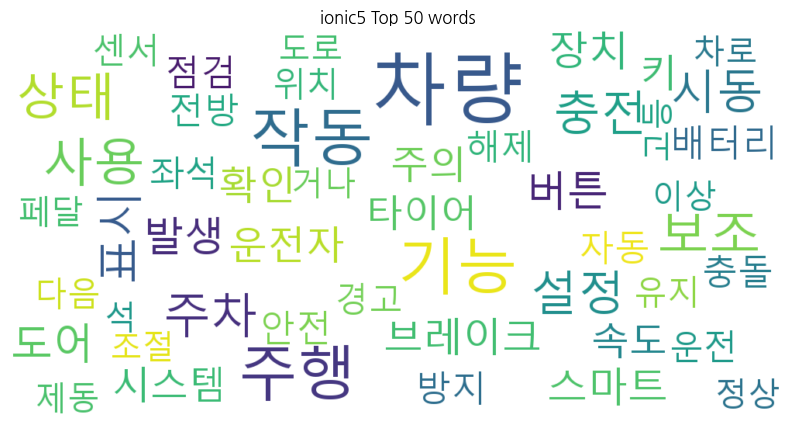

In [6]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
ionic5_top_words_dict = dict(ionic5_top_words)

# 2. 워드 클라우드 시각화
ionic5_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(ionic5_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(ionic5_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("ionic5 Top 50 words")
plt.show()

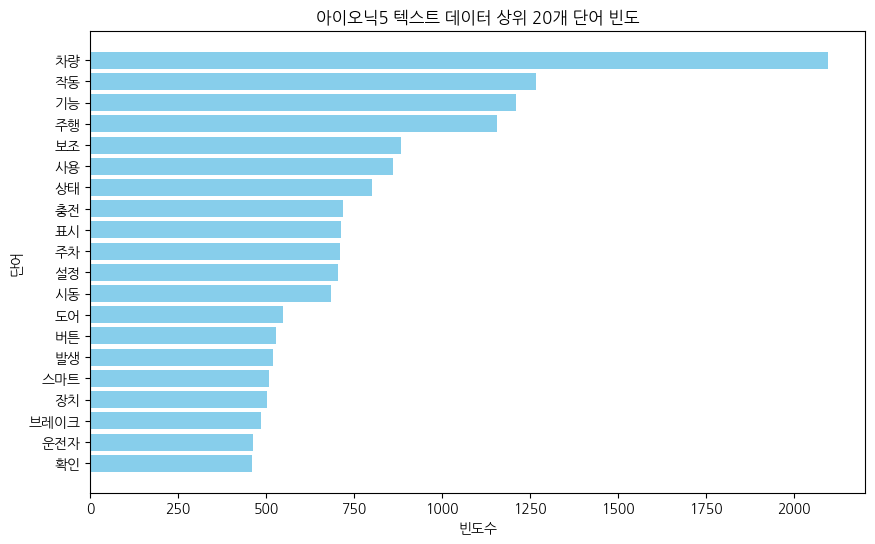

In [7]:
ionic5_top_words2 = ionic5_word_freq.most_common(20)
ionic5_top_words_dict2 = dict(ionic5_top_words2)
ionic5_words, ionic5_counts = zip(*ionic5_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(ionic5_words, ionic5_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('아이오닉5 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF 기반 분석

차량: 11.6776
표시: 9.1117
작동: 7.1944
기능: 6.9524
주행: 6.9450
고등: 6.5226
보조: 6.1979
상태: 5.3607
시동: 5.3245
도어: 4.9367
브레이크: 4.5687
설정: 4.2955
버튼: 4.1434
주차: 4.1372
사용: 3.9629
타이어: 3.8649
안전: 3.8042
장치: 3.7813
점검: 3.7559
충전: 3.7555
확인: 3.6518
스마트: 3.5851
발생: 3.5844
전방: 3.4087
좌석: 3.3862
시스템: 3.2137
클러스터: 3.1068
운전자: 3.0769
이상: 3.0601
제동: 2.8655
배터리: 2.8530
차로: 2.8377
전조등: 2.7026
센터: 2.6595
미러: 2.5944
스위치: 2.5748
센서: 2.5654
운전: 2.5463
경고: 2.5232
자동: 2.4904
모드: 2.4870
비상: 2.4095
디지털: 2.4026
충돌: 2.4008
속도: 2.3704
조절: 2.3551
당사: 2.3487
주의: 2.3219
해제: 2.3090
게이트: 2.3089


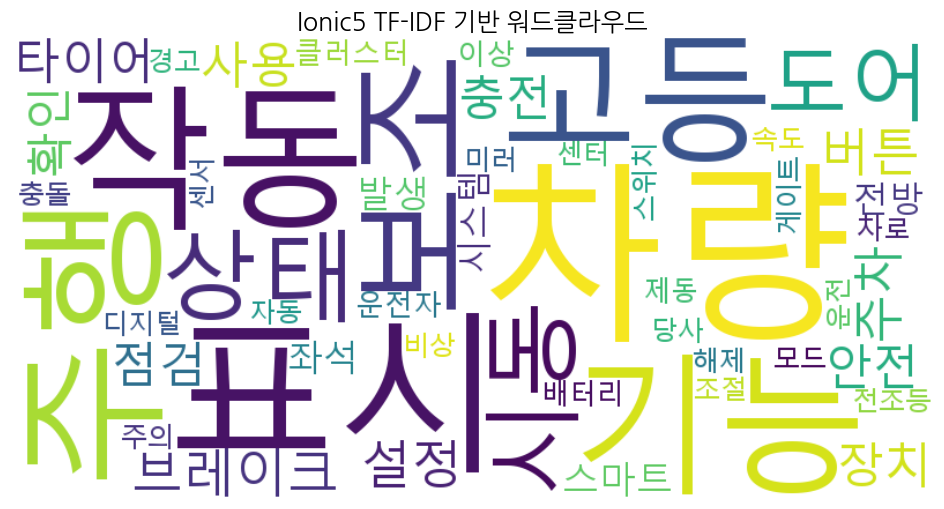

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
ionic5_docs = [' '.join(tokens) for tokens in ionic5_filtered_tokens]

# 2. TF-IDF 벡터화
ionic5_vectorizer = TfidfVectorizer()
ionic5_X = ionic5_vectorizer.fit_transform(ionic5_docs)

# 3. 단어와 점수 추출
ionic5_words = ionic5_vectorizer.get_feature_names_out()
ionic5_scores = ionic5_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
ionic5_word_scores = dict(zip(ionic5_words, ionic5_scores))

ionic5_top_50 = sorted(ionic5_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for ionic5_word, ionic5_score in ionic5_top_50:
    print(f"{ionic5_word}: {ionic5_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
ionic5_top_50_dict = dict(ionic5_top_50)

# 워드클라우드 생성
ionic5_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(ionic5_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(ionic5_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ionic5 TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프

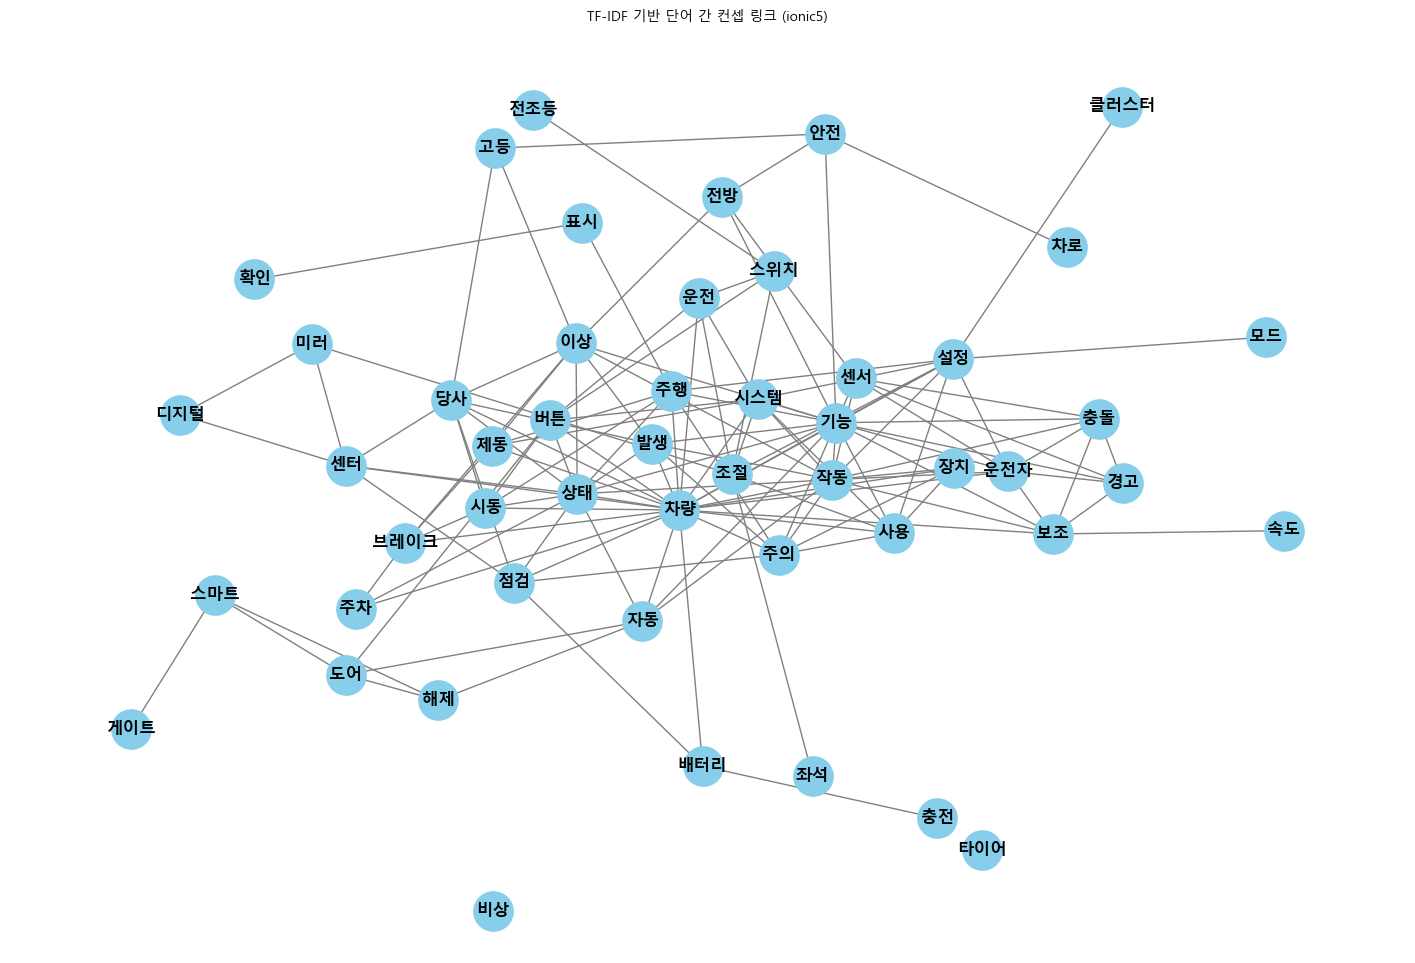

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. ionic5_top_50 단어 리스트와 인덱스 추출
ionic5_top_words = [word for word, score in ionic5_top_50]
ionic5_top_indices = [ionic5_vectorizer.vocabulary_[word] for word in ionic5_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
ionic5_word_vectors = ionic5_X[:, ionic5_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
ionic5_similarity_matrix = cosine_similarity(ionic5_word_vectors)

# 4. 네트워크 그래프 생성
ionic5_G = nx.Graph()

# 노드 추가
for word in ionic5_top_words:
    ionic5_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
ionic5_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(ionic5_top_words)):
    for j in range(i + 1, len(ionic5_top_words)):
        sim = ionic5_similarity_matrix[i][j]
        if sim >= ionic5_threshold:
            ionic5_G.add_edge(ionic5_top_words[i], ionic5_top_words[j], weight=sim)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
ionic5_pos = nx.spring_layout(ionic5_G, k=0.5, seed=42)
nx.draw_networkx_nodes(ionic5_G, ionic5_pos, node_color='skyblue', node_size=800)

# ✅ 한글 폰트 설정: font_family에 폰트 이름 넣기
nx.draw_networkx_labels(
    ionic5_G, ionic5_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(ionic5_G, ionic5_pos, edge_color='gray')

# 제목에도 폰트 적용하고 싶다면:
plt.title("TF-IDF 기반 단어 간 컨셉 링크 (ionic5)", fontsize=50, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [10]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

ionic5['cut_off'] = ionic5['text'].apply(is_cut_off)
ionic5_cut = ionic5[ionic5['cut_off']]
print(ionic5_cut[['text']])

Empty DataFrame
Columns: [text]
Index: []


In [11]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = ionic5[ionic5['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])


Empty DataFrame
Columns: [text]
Index: []


In [12]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
ionic5['perplexity'] = ionic5['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = ionic5.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 119/119 [02:00<00:00,  1.02s/it]

                                                  text  perplexity
22   M\n전자식 주차 브레이크(Electric parki\nng brake) 이상\n상...  178.552068
82   시동 및 주행\n6.\n이 장에서는 차량의 시동을 켜고 주행하기 위해 필요한 정보와...   99.817925
93   운전자 보조 기능\n7.\n이 장에서는 다양한 운전자 보조 기능의 사용법을 설명합니...   91.186820
31   N\n상태별 표시등 색상은 다음과 같습니다.\n•\n•\n흰색: 자동 정차 기능 켜...   88.574271
38   `\n미등 표시등\n_ 미등 작동 중 켜집니다(조명 스위치 위치: 미등 켜짐/AUT...   80.352263
25   S\n상태별 경고등 색상 •\n주황색: 전방/측방 안전 기능 미설\n정/기능 고장 ...   64.356581
28   f\n사륜구동에 이상 발생 시 켜짐\n표시등 확인하기\n표시등의 의미를 확인하고 필...   57.929265
30   ¢\n설명\n고전압 배터리의 충전 상태를 표시합니다.\n•\n충전 중 녹색으로 켜집...   55.669029
15   ®\n•\n•\n•\n•\n•\n•\n전기차 제어 시스템 관련 센서 고장\n발생\n...   48.066744
118  전구 교체하기\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•\n•...   44.170034


In [3]:
print(ionic5.loc[22,'text'])


M
전자식 주차 브레이크(Electric parki
ng brake) 이상
상태별 경고등 색상 •
주황색: 전방 안전 기능 미설정/기
능 고장 또는 이상 발생
빨간색 깜빡임: 전방 안전/전방 교
차 안전 기능 작동 중
•
전방 안전 경고등


# 줄바꿈이 조금 이상하긴 한데 깨진 내용은 없음.

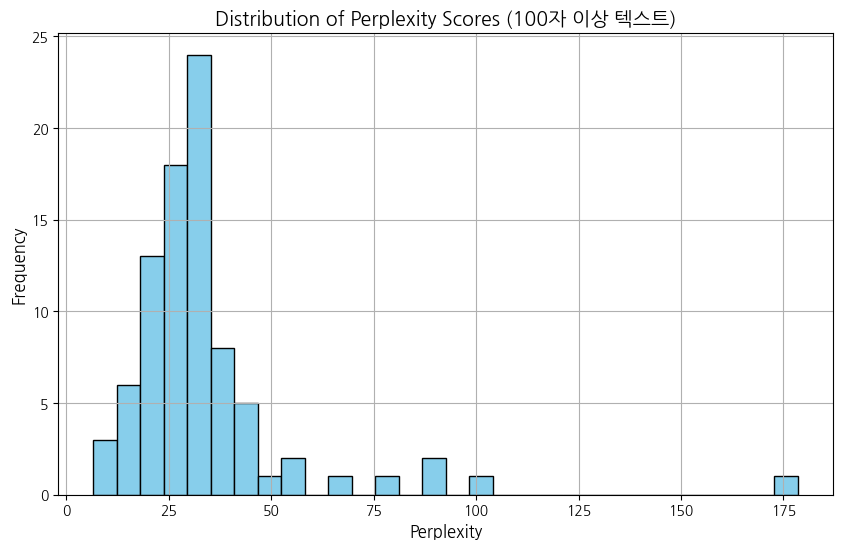

In [13]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = ionic5['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()
